In [80]:
import numpy as np
import seaborn as sns
import scipy.signal as signal
import matplotlib.pyplot as plt
import pprint
import json

In [87]:
with open("trials.json", "r") as f:
    metadata = json.load(f)

In [88]:
LAMBDA = 632.8 * 10**-9 # meters
DISTANCE = 0.03         # meters

## Analysis
The purpose of this Jupyter notebook is to help with fine-tuning the peak detection mechanism, etc, which requires a human to look over the data. All of the preprocessing is done in `interferometry.py`.

In [89]:
def moving_mean(x_array, N):
    window = np.cumsum(np.insert(x_array, 0, 0)) 
    return (window[N:] - window[:-N]) / float(N)

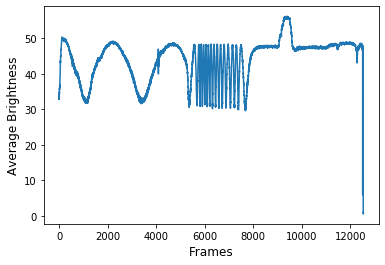

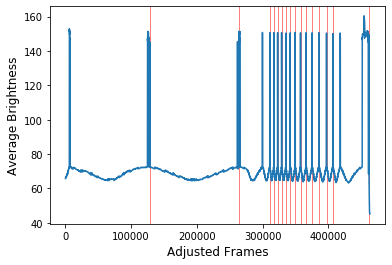

3
Trial 1
Data points: 463238
Peaks: 19


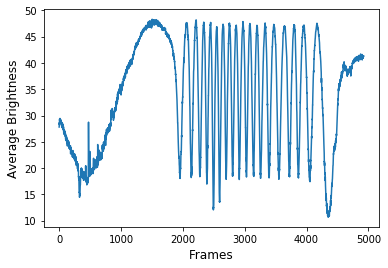

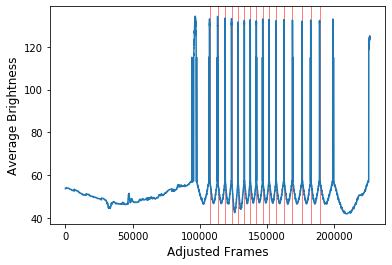

2
Trial 2
Data points: 226606
Peaks: 18


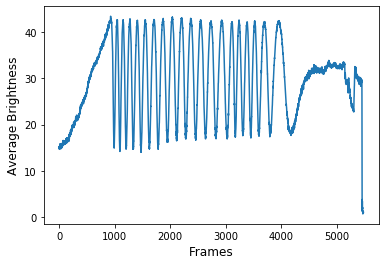

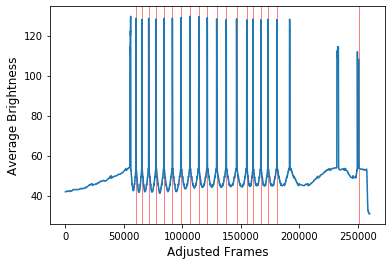

3
Trial 3
Data points: 260150
Peaks: 22


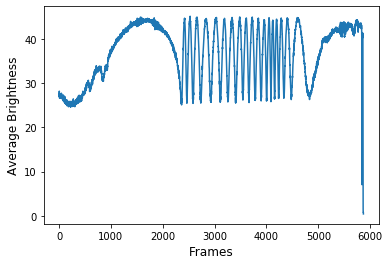

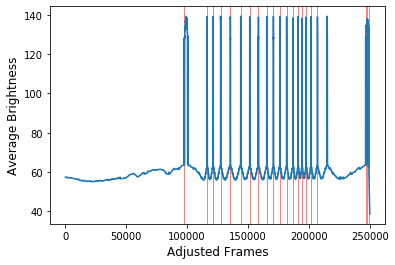

1
Trial 4
Data points: 250060
Peaks: 22


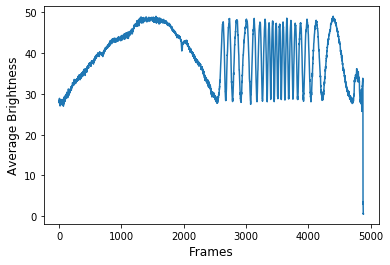

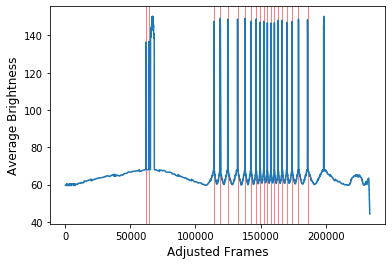

1
Trial 5
Data points: 233982
Peaks: 21


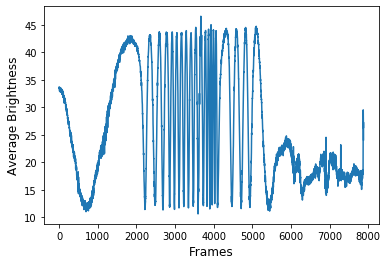

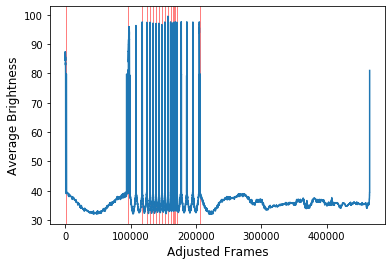

4
Trial 6
Data points: 465954
Peaks: 21


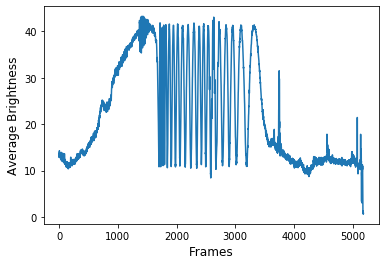

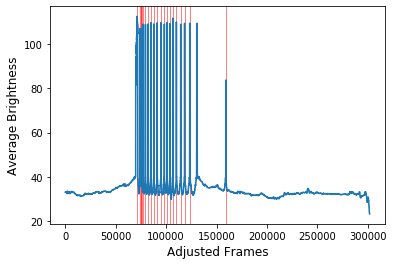

1
Trial 7
Data points: 301900
Peaks: 22


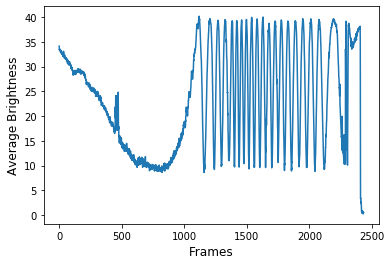

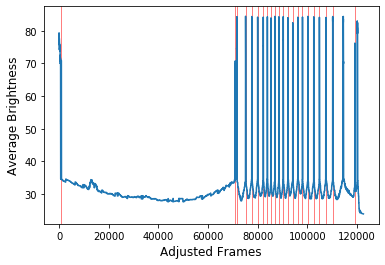

0
Trial 8
Data points: 122550
Peaks: 22


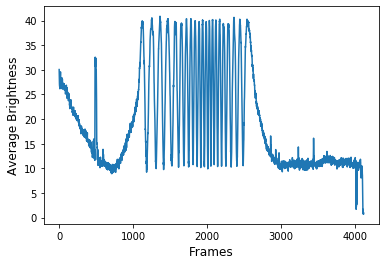

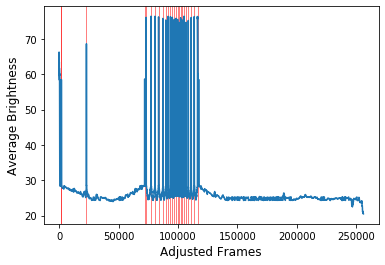

0
Trial 9
Data points: 255860
Peaks: 25


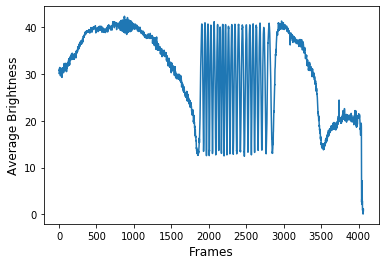

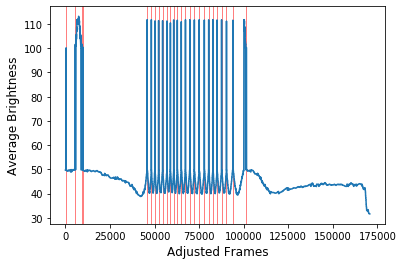

-1
Trial 10
Data points: 170698
Peaks: 25


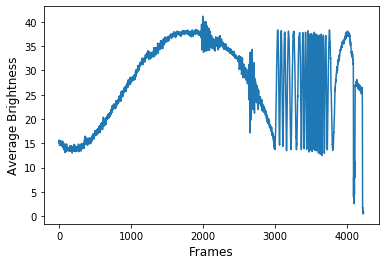

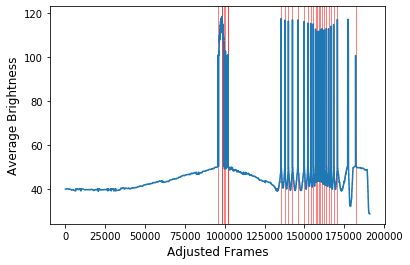

-5
Trial 11
Data points: 191026
Peaks: 23


In [102]:
y_data = np.load("dataset.pickle.npy", allow_pickle=True)
results = []
for count, each_trial in enumerate(y_data):
    trial_results = {}
    trial = count + 1
#     print(each_trial)
    plt.plot(each_trial)
    plt.xlabel('Frames', fontsize=12)
    plt.ylabel('Average Brightness', fontsize=12)
    plt.savefig(str(trial) + "_raw.pdf")
    plt.show()
    plt.close()
    x = [x for x in range(len(each_trial))]
    mean = moving_mean(each_trial, 9)
    weighted_normalization = moving_mean(each_trial, 100).tolist()
    average = np.average(each_trial)
    weighted_mean = [x + average - 0.4*x*weighted_normalization[count*(len(weighted_normalization)//len(mean))]//average for count, x  in enumerate(mean.tolist())]

    average_weight = np.average(weighted_mean)

    stretched_weighted_mean = []
    for each_x in weighted_mean:
        if each_x <= average_weight:
            for i in range(100):
                stretched_weighted_mean.append(each_x)
        else:
            for i in range(2):
                stretched_weighted_mean.append(each_x*2)
#     x = 2
#     stretched_weighted_mean = stretched_weighted_mean[round((x*len(stretched_weighted_mean)/100)):round(((x+10)*len(stretched_weighted_mean)/100))]
    peaks = signal.find_peaks(stretched_weighted_mean, width=2, distance=200,prominence=4, wlen = 150)[0].tolist()
    # peaks = signal.find_peaks(mean, width=1, distance=2, wlen = 10)[0].tolist()
    # peaks = signal.find_peaks(weighted_mean, width=5, distance=30, prominence = 1, wlen = 100)[0].tolist()
    for count, each_peak in enumerate(peaks):
        plt.axvspan(abs(each_peak-0.5), each_peak+0.5, color='red', alpha=0.5)

    # plt.plot(signal.savgol_filter(each_trial, 55, 1))
    # plt.plot(moving_mean(each_trial, 10))
    # plt.plot(mean)
    # plt.plot(weighted_mean)
    plt.plot(stretched_weighted_mean)
    plt.xlabel('Adjusted Frames', fontsize=12)
    plt.ylabel('Average Brightness', fontsize=12)
    plt.savefig(str(trial) + "_final.pdf")
    plt.show()
    plt.close()
    # plt.plot(each_trial)
    trial_results["trial"] = trial
    trial_results["points"] = len(stretched_weighted_mean)
    trial_results["peaks"] = len(peaks) + metadata[str(trial)]["add"]
    trial_results["k"] = len(peaks)*LAMBDA/(2*DISTANCE*metadata[str(trial)]["torr"])
    trial_results["delta_p"] = metadata[str(trial)]["torr"]
    
    print(metadata[str(trial)]["add"])
    print("Trial", trial_results["trial"])
    print("Data points:", trial_results["points"])
    print("Peaks:", trial_results["peaks"])
    results.append(trial_results)

In [91]:
pprint.pprint(results)

[{'delta_p': 415,
  'k': 4.066184738955824e-07,
  'peaks': 19,
  'points': 463238,
  'trial': 1},
 {'delta_p': 400,
  'k': 4.218666666666667e-07,
  'peaks': 18,
  'points': 226606,
  'trial': 2},
 {'delta_p': 440,
  'k': 4.5542424242424245e-07,
  'peaks': 22,
  'points': 260150,
  'trial': 3},
 {'delta_p': 420,
  'k': 5.273333333333334e-07,
  'peaks': 22,
  'points': 250060,
  'trial': 4},
 {'delta_p': 430,
  'k': 4.905426356589147e-07,
  'peaks': 21,
  'points': 233982,
  'trial': 5},
 {'delta_p': 440,
  'k': 4.074848484848485e-07,
  'peaks': 21,
  'points': 465954,
  'trial': 6},
 {'delta_p': 460,
  'k': 4.814782608695653e-07,
  'peaks': 22,
  'points': 301900,
  'trial': 7},
 {'delta_p': 440,
  'k': 5.273333333333334e-07,
  'peaks': 22,
  'points': 122550,
  'trial': 8},
 {'delta_p': 460,
  'k': 5.731884057971016e-07,
  'peaks': 25,
  'points': 255860,
  'trial': 9},
 {'delta_p': 490,
  'k': 5.596190476190476e-07,
  'peaks': 25,
  'points': 170698,
  'trial': 10},
 {'delta_p': 480,


In [92]:
total_list = []
for each_trial in results:
    total_list.append(each_trial["k"])

avg = sum(total_list)/len(total_list)
print(avg)
print(np.std(total_list))
print(np.std(total_list)/avg)

4.96919224573169e-07
6.700096914361797e-08
0.13483271692933343


In [108]:
json.dumps(results)

'[{"trial": 1, "points": 463238, "peaks": 19, "k": 4.066184738955824e-07, "delta_p": 415}, {"trial": 2, "points": 226606, "peaks": 18, "k": 4.218666666666667e-07, "delta_p": 400}, {"trial": 3, "points": 260150, "peaks": 22, "k": 4.5542424242424245e-07, "delta_p": 440}, {"trial": 4, "points": 250060, "peaks": 22, "k": 5.273333333333334e-07, "delta_p": 420}, {"trial": 5, "points": 233982, "peaks": 21, "k": 4.905426356589147e-07, "delta_p": 430}, {"trial": 6, "points": 465954, "peaks": 21, "k": 4.074848484848485e-07, "delta_p": 440}, {"trial": 7, "points": 301900, "peaks": 22, "k": 4.814782608695653e-07, "delta_p": 460}, {"trial": 8, "points": 122550, "peaks": 22, "k": 5.273333333333334e-07, "delta_p": 440}, {"trial": 9, "points": 255860, "peaks": 25, "k": 5.731884057971016e-07, "delta_p": 460}, {"trial": 10, "points": 170698, "peaks": 25, "k": 5.596190476190476e-07, "delta_p": 490}, {"trial": 11, "points": 191026, "peaks": 23, "k": 6.152222222222223e-07, "delta_p": 480}]'